In [ ]:
#install simpletransformers library
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.6/289.6 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.3 

In [ ]:
#install sentence-transformer library
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

#Experiment - 1: XLMRoberta + without sentiment score

In [ ]:
import pandas as pd
train_data = pd.read_csv('training_set.csv', usecols = ['Topic_News_Cleaned','labels'])
test_data = pd.read_csv('test_set.csv', usecols = ['Topic_News_Cleaned','labels'])

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
import numpy as np
model = SentenceTransformer('xlm-r-bert-base-nli-stsb-mean-tokens')
train_sentence_embeddings = model.encode(train_data['Topic_News_Cleaned'])
train_features = np.c_[train_sentence_embeddings]
test_sentence_embeddings = model.encode(test_data['Topic_News_Cleaned'])
test_features = np.c_[test_sentence_embeddings]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##Logistic Regression

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(train_features, train_data['labels'])
pred_labels = log_reg_model.predict(test_features)
print(accuracy_score(test_data['labels'], pred_labels))

0.7020725388601037


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[291 110]
 [120 251]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       401
           1       0.70      0.68      0.69       371

    accuracy                           0.70       772
   macro avg       0.70      0.70      0.70       772
weighted avg       0.70      0.70      0.70       772



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_features, train_data['labels'])
pred_labels = clf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[331  70]
 [ 78 293]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       401
           1       0.81      0.79      0.80       371

    accuracy                           0.81       772
   macro avg       0.81      0.81      0.81       772
weighted avg       0.81      0.81      0.81       772



##SVM

In [ ]:
from sklearn.svm import LinearSVC
SVM = LinearSVC()
SVM.fit(train_features, train_data['labels'])
pred_labels = SVM.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[321  80]
 [ 79 292]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       401
           1       0.78      0.79      0.79       371

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xgb_model.fit(train_features, train_data['labels'])
preds = xgb_model.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[321  80]
 [ 79 292]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       401
           1       0.78      0.79      0.79       371

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(train_features, train_data['labels'])
pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[343  58]
 [ 78 293]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       401
           1       0.83      0.79      0.81       371

    accuracy                           0.82       772
   macro avg       0.82      0.82      0.82       772
weighted avg       0.82      0.82      0.82       772



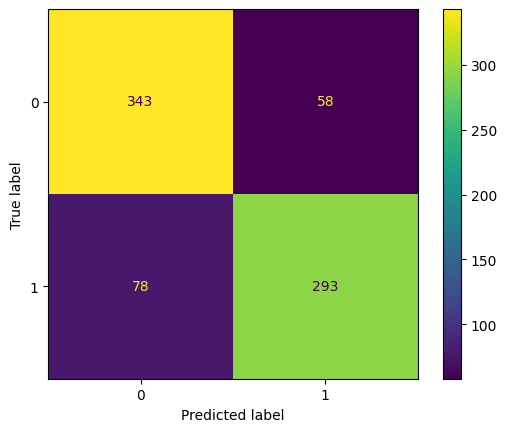

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_data['labels'], pred_labels), display_labels=rf.classes_)
disp.plot()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

##LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape, Dropout, Flatten
from tensorflow.python.keras import regularizers

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_data['labels'], test_size=0.2, random_state=42)

In [ ]:
input_layer = Input(shape=(768,), dtype='float32')
reshape_layer = Reshape((768, 1))(input_layer)
lstm_layer = LSTM(64, return_sequences=True)(reshape_layer)
dropout_layer = Dropout(0.5)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flatten_layer)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 768)]             0         
                                                                 
 reshape_3 (Reshape)         (None, 768, 1)            0         
                                                                 
 lstm_2 (LSTM)               (None, 768, 64)           16896     
                                                                 
 dropout_2 (Dropout)         (None, 768, 64)           0         
                                                                 
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                3145792   
                                                                 
 dense_7 (Dense)             (None, 32)                2080

In [ ]:
predictions = model.predict(test_sentence_embeddings)
binary_predictions = (predictions > 0.5).astype("int32")
binary_predictions = binary_predictions.reshape(-1)
accuracy = np.mean(binary_predictions == test_data['labels'])
print("Accuracy on the test dataset:", accuracy)

25/25 [==============================] - 6s 210ms/step
Accuracy on the test dataset: 0.6256476683937824


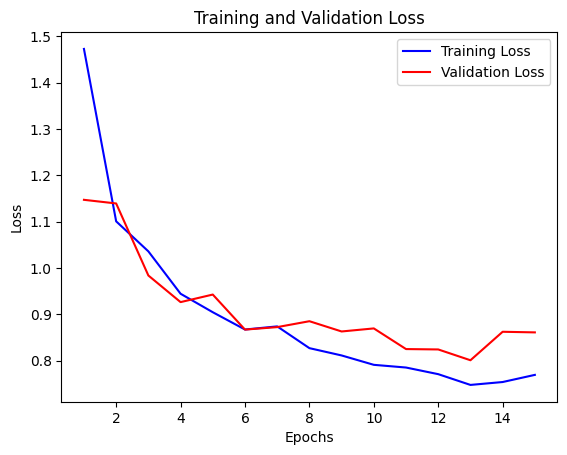

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Loss')
plt.plot(epochs, val_acc, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##BiLSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
input_layer = Input(shape=(768,), dtype='float32')
reshape_layer = Reshape((768, 1))(input_layer)
blstm_layer = Bidirectional(LSTM(64, return_sequences=True))(reshape_layer)
dropout_layer = Dropout(0.5)(blstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flatten_layer)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 768)]             0         
                                                                 
 reshape_4 (Reshape)         (None, 768, 1)            0         
                                                                 
 bidirectional (Bidirection  (None, 768, 128)          33792     
 al)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 768, 128)          0         
                                                                 
 flatten_3 (Flatten)         (None, 98304)             0         
                                                                 
 dense_9 (Dense)             (None, 64)                6291520   
                                                           

In [ ]:
predictions = model.predict(test_features)
binary_predictions = (predictions > 0.5).astype("int32")
binary_predictions = binary_predictions.reshape(-1)
accuracy = np.mean(binary_predictions == test_data['labels'])
print("Accuracy on the test dataset:", accuracy)

25/25 [==============================] - 5s 171ms/step
Accuracy on the test dataset: 0.6632124352331606


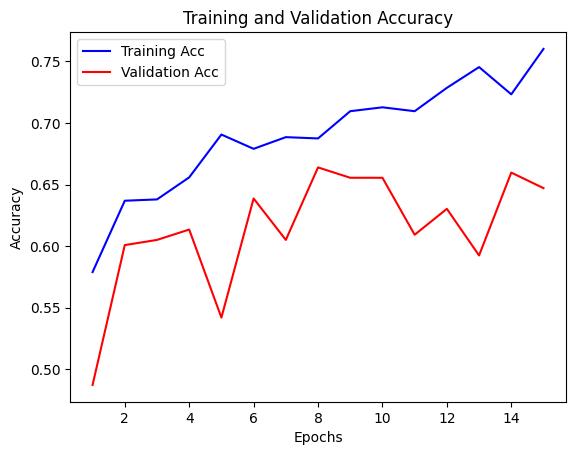

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Reshape, Input
from tensorflow.keras import regularizers

model = Sequential()

model.add(Input(shape=(768,), dtype='float32'))
model.add(Reshape((768, 1)))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Conv1D(64, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 768, 1)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 767, 32)           96        
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 383, 32)           0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 383, 32)           0         
                                                                 
 conv1d_10 (Conv1D)          (None, 382, 64)           4160      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 191, 64)           0         
 g1D)                                                 

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
30/30 [==============================] - 3s 60ms/step - loss: 1.3271 - accuracy: 0.5063 - val_loss: 0.8929 - val_accuracy: 0.4622
Epoch 2/15
30/30 [==============================] - 2s 52ms/step - loss: 0.7831 - accuracy: 0.5526 - val_loss: 0.7260 - val_accuracy: 0.5882
Epoch 3/15
30/30 [==============================] - 2s 80ms/step - loss: 0.7108 - accuracy: 0.5832 - val_loss: 0.7114 - val_accuracy: 0.5420
Epoch 4/15
30/30 [==============================] - 3s 85ms/step - loss: 0.6881 - accuracy: 0.6116 - val_loss: 0.6778 - val_accuracy: 0.6303
Epoch 5/15
30/30 [==============================] - 2s 51ms/step - loss: 0.6776 - accuracy: 0.6368 - val_loss: 0.6730 - val_accuracy: 0.6597
Epoch 6/15
30/30 [==============================] - 2s 54ms/step - loss: 0.6789 - accuracy: 0.6137 - val_loss: 0.6727 - val_accuracy: 0.6765
Epoch 7/15
30/30 [==============================] - 2s 50ms/step - loss: 0.6601 - accuracy: 0.6600 - val_loss: 0.6774 - val_accuracy: 0.6050
Epoch 8/15
30

In [ ]:
model_loss, model_accuracy = model.evaluate(test_features, test_data['labels'])
print(f"Test Loss: {model_loss:.4f}, Test Accuracy: {model_accuracy:.4f}")

25/25 [==============================] - 0s 13ms/step - loss: 0.7034 - accuracy: 0.6464
Test Loss: 0.7034, Test Accuracy: 0.6464


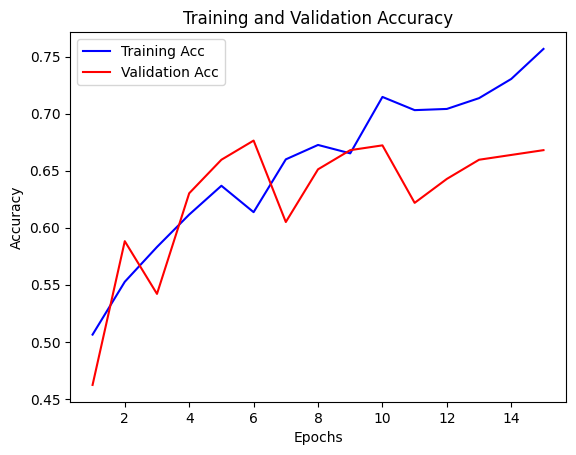

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

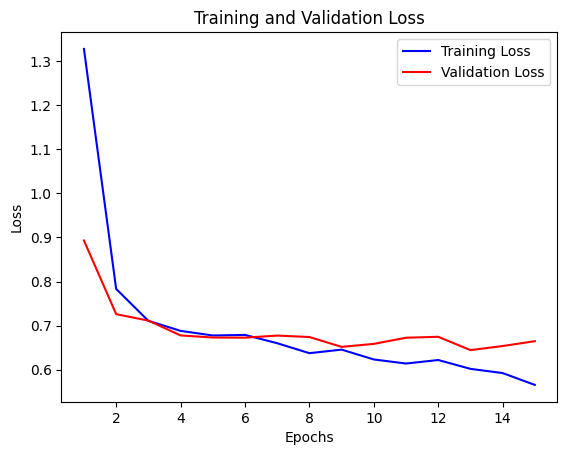

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Loss')
plt.plot(epochs, val_acc, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Experiment - 2 : XLMRoberta + All models + sentiment score

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/training_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])
test_data = pd.read_csv('/content/drive/MyDrive/test_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
model = SentenceTransformer('xlm-r-bert-base-nli-stsb-mean-tokens')
train_sentence_embeddings = model.encode(train_data['Topic_News_Cleaned'])
train_features = np.c_[train_sentence_embeddings, train_data['Sentiment_score']]
test_sentence_embeddings = model.encode(test_data['Topic_News_Cleaned'])
test_features = np.c_[test_sentence_embeddings, test_data['Sentiment_score']]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.05k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##Logistic Regression

In [ ]:
log_reg_model = LogisticRegression()
log_reg_model.fit(train_features, train_data['labels'])
pred_labels = log_reg_model.predict(test_features)
print(accuracy_score(test_data['labels'], pred_labels))

0.7059585492227979


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[293 108]
 [119 252]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       401
           1       0.70      0.68      0.69       371

    accuracy                           0.71       772
   macro avg       0.71      0.70      0.71       772
weighted avg       0.71      0.71      0.71       772



##Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_features, train_data['labels'])
pred_labels = clf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[331  70]
 [ 84 287]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       401
           1       0.80      0.77      0.79       371

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



##SVM

In [ ]:
from sklearn.svm import LinearSVC
SVM = LinearSVC()
SVM.fit(train_features, train_data['labels'])
pred_labels = SVM.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[321  80]
 [ 79 292]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       401
           1       0.78      0.79      0.79       371

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
xgb_model.fit(train_features, train_data['labels'])
preds = xgb_model.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[321  80]
 [ 79 292]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       401
           1       0.78      0.79      0.79       371

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772



##Random Forest

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, random_state=0)
rf.fit(train_features, train_data['labels'])
pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[335  66]
 [ 51 320]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       401
           1       0.83      0.86      0.85       371

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772



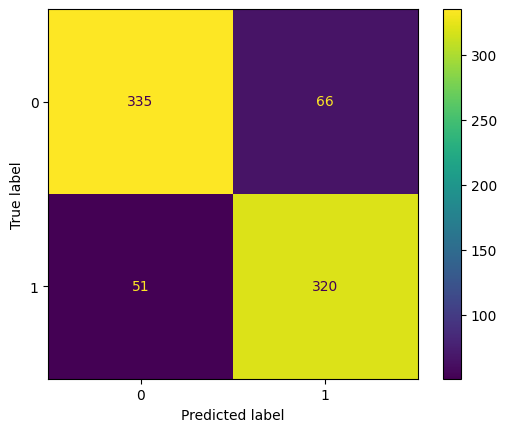

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_data['labels'], pred_labels), display_labels=rf.classes_)
disp.plot()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

##LSTM

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Reshape, Dropout, Flatten
from tensorflow.python.keras import regularizers

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, train_data['labels'], test_size=0.2, random_state=42)

In [ ]:
input_layer = Input(shape=(769,), dtype='float32')
reshape_layer = Reshape((769, 1))(input_layer)
lstm_layer = LSTM(64, return_sequences=True)(reshape_layer)
dropout_layer = Dropout(0.5)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flatten_layer)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 769)]             0         
                                                                 
 reshape_1 (Reshape)         (None, 769, 1)            0         
                                                                 
 lstm_1 (LSTM)               (None, 769, 64)           16896     
                                                                 
 dropout_1 (Dropout)         (None, 769, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 49216)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                3149888   
                                                                 
 dense_4 (Dense)             (None, 32)                2080

In [ ]:
predictions = model.predict(test_features)
binary_predictions = (predictions > 0.5).astype("int32")
binary_predictions = binary_predictions.reshape(-1)
accuracy = np.mean(binary_predictions == test_data['labels'])
print("Accuracy on the test dataset:", accuracy)

25/25 [==============================] - 3s 104ms/step
Accuracy on the test dataset: 0.6541450777202072


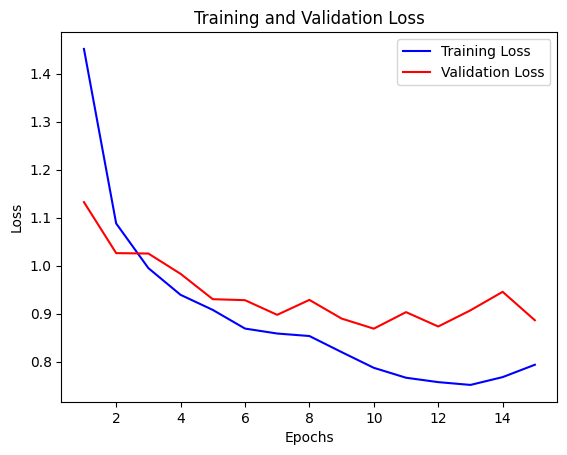

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Loss')
plt.plot(epochs, val_acc, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##BiLSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
input_layer = Input(shape=(769,), dtype='float32')
reshape_layer = Reshape((769, 1))(input_layer)
blstm_layer = Bidirectional(LSTM(64, return_sequences=True))(reshape_layer)
dropout_layer = Dropout(0.5)(blstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flatten_layer)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64)


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 769)]             0         
                                                                 
 reshape_5 (Reshape)         (None, 769, 1)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 769, 128)          33792     
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 769, 128)          0         
                                                                 
 flatten_4 (Flatten)         (None, 98432)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                6299712   
                                                           

In [ ]:
predictions = model.predict(test_features)
binary_predictions = (predictions > 0.5).astype("int32")
binary_predictions = binary_predictions.reshape(-1)
accuracy = np.mean(binary_predictions == test_data['labels'])
print("Accuracy on the test dataset:", accuracy)

25/25 [==============================] - 7s 243ms/step
Accuracy on the test dataset: 0.6398963730569949


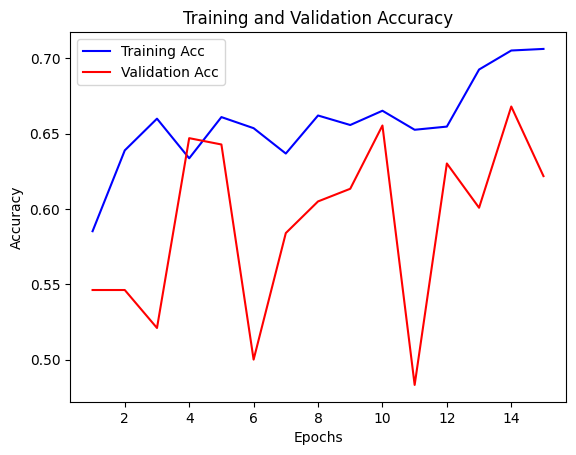

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Dense, Input
from tensorflow.keras.models import Model
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("ai4bharat/IndicBERTv2-MLM-only")
max_len = 256

train_sequences = tokenizer(train_data['Topic_News_Cleaned'].tolist(), padding='max_length', truncation=True, max_length=max_len, return_tensors="tf")
test_sequences = tokenizer(test_data['Topic_News_Cleaned'].tolist(), padding='max_length', truncation=True, max_length=max_len, return_tensors="tf")

train_input_ids = train_sequences["input_ids"]
test_input_ids = test_sequences["input_ids"]

train_labels = np.array(train_data['labels'])
test_labels = np.array(test_data['labels'])

embedding_dim = 128
num_filters = 128
filter_size = 3

text_input = Input(shape=(max_len,))
embedded = Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim, input_length=max_len)(text_input)
conv1d = Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu')(embedded)
pool = MaxPooling1D(pool_size=2)(conv1d)
flat = Flatten()(pool)
dense1 = Dense(units=64, activation='relu')(flat)
output = Dense(units=1, activation='sigmoid')(dense1)

model = Model(inputs=text_input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

history = model.fit(train_input_ids, train_labels, epochs=10)
model_loss, model_accuracy = model.evaluate(test_input_ids, test_labels)
print(f"Test Loss: {model_loss:.4f}, Test Accuracy: {model_accuracy:.4f}")

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 256, 128)          32000000  
                                                                 
 conv1d_8 (Conv1D)           (None, 254, 128)          49280     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 127, 128)          0         
 g1D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 16256)             0         
                                                                 
 dense_16 (Dense)            (None, 64)                1040448   
                                                           

# Experiment - 3: HindiBert + Random Forest (with and without sentiment score)

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/training_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])
test_data = pd.read_csv('/content/drive/MyDrive/test_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("l3cube-pune/hindi-sentence-similarity-sbert")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/950M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/525 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
train_vectors = model.encode(train_data['Topic_News_Cleaned'])
test_vectors = model.encode(test_data['Topic_News_Cleaned'])

train_features = np.c_[train_vectors, train_data['Sentiment_score']]
test_features = np.c_[test_vectors, test_data['Sentiment_score']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth=15, random_state=0, criterion="entropy")
rf.fit(train_vectors, train_data['labels'])

pred_labels = rf.predict(test_vectors)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[319  82]
 [ 74 297]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       401
           1       0.78      0.80      0.79       371

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth=15, random_state=0, criterion="entropy")
rf.fit(train_features, train_data['labels'])

pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[331  70]
 [ 60 311]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       401
           1       0.82      0.84      0.83       371

    accuracy                           0.83       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.83      0.83      0.83       772



#Experiment - 4 : DistilBert + Random Forest (with and without sentiment score)

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2")

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/training_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])
test_data = pd.read_csv('/content/drive/MyDrive/test_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])

In [ ]:
train_embeddings = model.encode(train_data['Topic_News_Cleaned'])
test_embeddings = model.encode(test_data['Topic_News_Cleaned'])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state=0)
rf.fit(train_embeddings, train_data['labels'])

pred_labels = rf.predict(test_embeddings)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[315  86]
 [ 72 299]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       401
           1       0.78      0.81      0.79       371

    accuracy                           0.80       772
   macro avg       0.80      0.80      0.80       772
weighted avg       0.80      0.80      0.80       772



In [ ]:
import numpy as np
train_features = np.c_[np.array(train_embeddings), train_data['Sentiment_score']]
test_features = np.c_[np.array(test_embeddings), test_data['Sentiment_score']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth=20, random_state=0, criterion="entropy")
rf.fit(train_features, train_data['labels'])

pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[317  84]
 [ 64 307]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       401
           1       0.79      0.83      0.81       371

    accuracy                           0.81       772
   macro avg       0.81      0.81      0.81       772
weighted avg       0.81      0.81      0.81       772



#Experiment - 5: mBERT + Random Forest

In [ ]:
from simpletransformers.language_representation import RepresentationModel
train_sentences = train_data['Topic_News_Cleaned']
test_sentences = test_data['Topic_News_Cleaned']

model = RepresentationModel(
    model_type="bert",
    model_name="bert-base-multilingual-uncased",
    use_cuda=False
)

train_vectors = model.encode_sentences(train_sentences, combine_strategy="mean")
test_vectors = model.encode_sentences(test_sentences, combine_strategy="mean")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

In [ ]:
train_features = np.c_[train_vectors, train_data['Sentiment_score']]
test_features = np.c_[test_vectors, test_data['Sentiment_score']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0, criterion="entropy")
rf.fit(train_vectors, train_data['labels'])
pred_labels = rf.predict(test_vectors)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[338  63]
 [ 48 323]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       401
           1       0.84      0.87      0.85       371

    accuracy                           0.86       772
   macro avg       0.86      0.86      0.86       772
weighted avg       0.86      0.86      0.86       772



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, max_depth=15, random_state=0, criterion="entropy")
rf.fit(train_features, train_data['labels'])
pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[345  56]
 [ 43 328]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       401
           1       0.85      0.88      0.87       371

    accuracy                           0.87       772
   macro avg       0.87      0.87      0.87       772
weighted avg       0.87      0.87      0.87       772



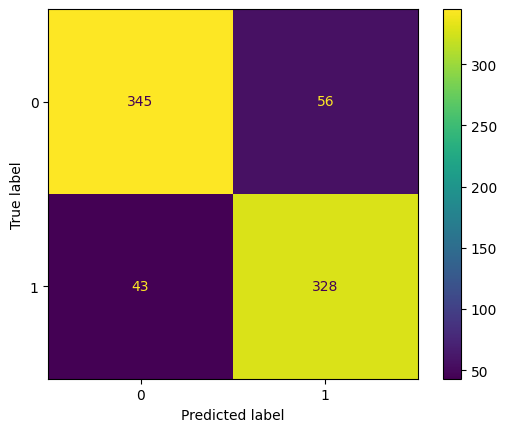

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(test_data['labels'], pred_labels), display_labels=rf.classes_)
disp.plot()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#Experiment - 6: MURIL + Random Forest

In [ ]:
import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/training_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])
test_data = pd.read_csv('/content/drive/MyDrive/test_set.csv', usecols = ['Topic_News_Cleaned','Sentiment_score','labels'])

In [ ]:
from simpletransformers.language_representation import RepresentationModel
train_sentences = train_data['Topic_News_Cleaned']
test_sentences = test_data['Topic_News_Cleaned']

model = RepresentationModel(
    model_type="bert",
    model_name="google/muril-base-cased",
    use_cuda=False
)

train_vectors = model.encode_sentences(train_sentences, combine_strategy="mean")
test_vectors = model.encode_sentences(test_sentences, combine_strategy="mean")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [ ]:
train_vectors.shape

(1188, 768)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state=0, criterion="entropy")
rf.fit(train_vectors, train_data['labels'])

pred_labels = rf.predict(test_vectors)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[343  58]
 [ 44 327]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       401
           1       0.85      0.88      0.87       371

    accuracy                           0.87       772
   macro avg       0.87      0.87      0.87       772
weighted avg       0.87      0.87      0.87       772



#Experiment - 7: MURIL + Random Forest + Sentiment Score

In [ ]:
from simpletransformers.language_representation import RepresentationModel
train_sentences = train_data['Topic_News_Cleaned']
test_sentences = test_data['Topic_News_Cleaned']

model = RepresentationModel(
    model_type="bert",
    model_name="google/muril-base-cased",
    use_cuda=False
)

train_vectors = model.encode_sentences(train_sentences, combine_strategy="mean")
test_vectors = model.encode_sentences(test_sentences, combine_strategy="mean")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [ ]:
train_vectors.shape

(1188, 768)

In [ ]:
import numpy as np
train_features = np.c_[train_vectors, train_data['Sentiment_score']]
test_features = np.c_[test_vectors, test_data['Sentiment_score']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, max_depth=10, random_state=0, criterion="entropy")
rf.fit(train_features, train_data['labels'])

pred_labels = rf.predict(test_features)
print(confusion_matrix(test_data['labels'], pred_labels))
print(classification_report(test_data['labels'], pred_labels))

[[350  51]
 [ 35 336]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       401
           1       0.87      0.91      0.89       371

    accuracy                           0.89       772
   macro avg       0.89      0.89      0.89       772
weighted avg       0.89      0.89      0.89       772

